In [126]:
import pandas as pd
import os

In [131]:
df = pd.read_csv('scores/handle_time_score.csv', index_col=0)
wis = df.loc['WISE-C']
df = df.loc['BRO_ah':]
df

,old,prophet,kpi,start_train,end_train
BRO_ah,34702.912281,37541.553703,handle_time,2016-03-10,2020-09-01
CS-Mar,24197.719298,24307.992113,handle_time,2017-01-01,2020-09-01
PSG_ah,104305.350877,72455.078836,handle_time,2017-01-10,2020-09-01
CS-Joh,21875.333333,24413.392752,handle_time,2017-01-01,2020-09-01
CS-Nat,11322.122807,7020.772130,handle_time,2017-01-01,2020-09-01
CS-Ala,5820.754386,11755.152740,handle_time,2016-04-30,2020-09-01
WISE-C,352606.070175,213364.695370,handle_time,2016-01-20,2020-09-01
RCS-PH,29702.736842,31530.660507,handle_time,2016-04-30,2020-09-01


In [132]:
df['diff (hours)'] = (df['old'] - df['prophet'])/3600
diff = df[df['diff (hours)']>0]['diff (hours)']
diff

PSG_ah     8.847298
CS-Nat     1.194820
WISE-C    38.678160
Name: diff (hours), dtype: float64

In [133]:
hours_saved = diff.sum()

print('Daily volumes Saved:',round(hours_saved,1))
print('Annual Savings:',"${:,.2f}".format(hours_saved * 262 * 25))

Daily volumes Saved: 48.7
Annual Savings: $319,117.81


# approximately 49 hours per day in handle time savings
accross 262 business days at approximately `$25 per hour = $319,117 per year` in labor allocation cost savings.

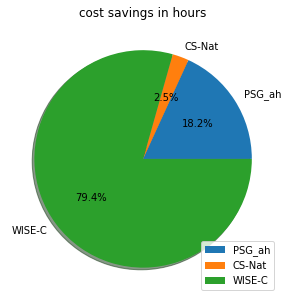

In [134]:
import matplotlib.pyplot as plt

df['diff (hours)'][df['diff (hours)']>0].plot.pie(autopct='%0.1f%%', figsize=(5, 5),
                                          shadow=True)
plt.title('cost savings in hours')
plt.ylabel('')
plt.legend(loc='lower right')
plt.show()